This notebook is to use different machine learning algorithm to solve the mean-variance optimization problem.

# Markowitz Portfolio Optimization Model
## Import data

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Define stocks
stocks = ['PFE', 'COST', 'AMZN', 'GOOGL', 'MRK', 'TSLA', 'LMT', 'BSX', 'HSBC', 'MSFT', 'ABM', 'CVX', 'MCD', 'AAPL', 'GS', 'CI']

In [2]:
end_date = pd.Timestamp.now()
start_date = end_date - pd.DateOffset(years=5)
raw = yf.download(stocks, start=start_date, end=end_date)
prices = raw["Adj Close"].dropna(how="all")
prices.tail()

[*********************100%***********************]  16 of 16 completed


,AAPL,ABM,AMZN,BSX,CI,COST,CVX,GOOGL,GS,HSBC,LMT,MCD,MRK,MSFT,PFE,TSLA
Date,,,,,,,,,,,,,,,,
2023-06-26,185.270004,41.360001,127.330002,53.500000,276.410004,523.419983,154.009995,118.339996,312.359985,38.470001,452.799988,289.089996,113.080002,328.600006,36.889999,241.050003
2023-06-27,188.059998,41.500000,129.179993,53.490002,275.799988,530.330017,153.529999,118.330002,313.450012,39.009998,453.149994,291.299988,113.320000,334.570007,36.419998,250.210007
2023-06-28,189.250000,41.939999,129.039993,53.450001,274.739990,532.799988,154.919998,120.180000,313.660004,38.900002,449.660004,291.739990,112.440002,335.850006,36.290001,256.239990
2023-06-29,189.589996,42.630001,127.900002,53.290001,277.250000,531.690002,156.240005,119.099998,323.089996,39.220001,457.440002,294.470001,113.540001,335.049988,36.119999,257.500000
2023-06-30,193.970001,42.650002,130.360001,54.090000,280.600006,538.380005,157.350006,119.699997,322.540009,39.619999,460.380005,298.410004,115.389999,340.540009,36.680000,261.769989


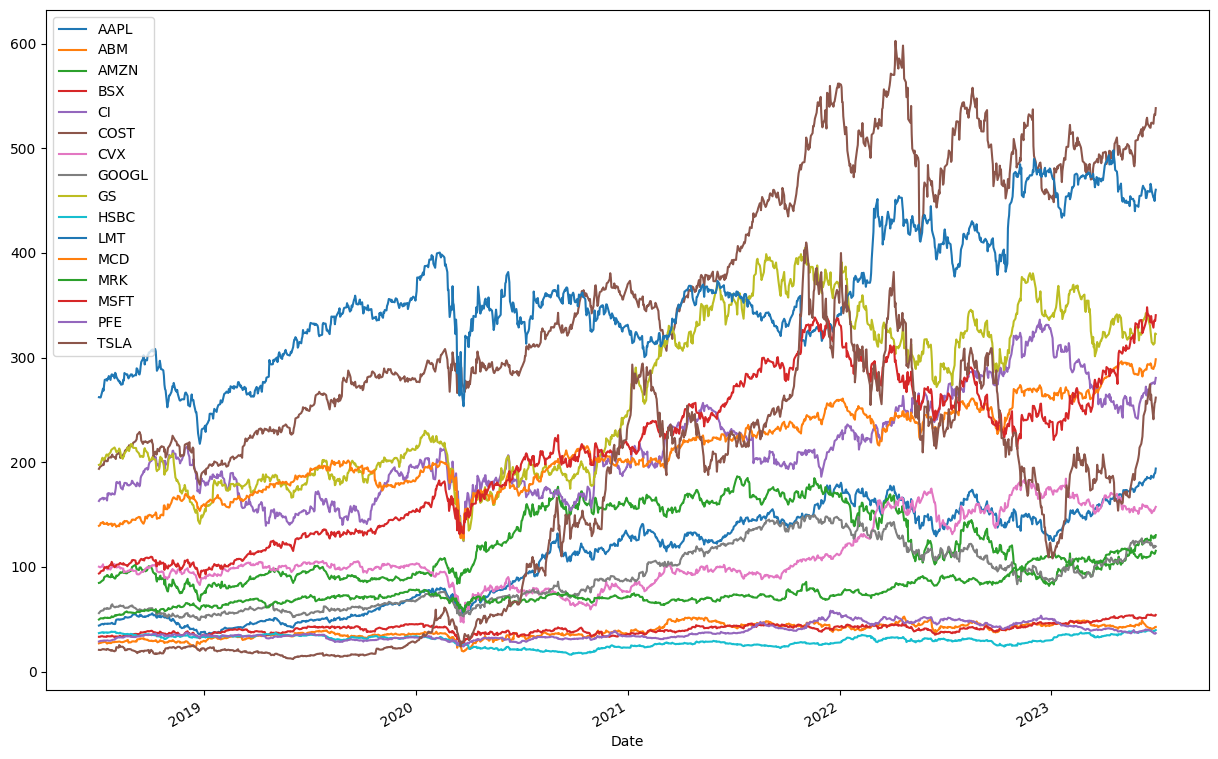

In [3]:
prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));

## covariance matrix

In [4]:
import pypfopt
pypfopt.__version__

'1.5.5'

In [5]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,AAPL,ABM,AMZN,BSX,CI,COST,CVX,GOOGL,GS,HSBC,LMT,MCD,MRK,MSFT,PFE,TSLA
AAPL,0.111113,0.049606,0.079107,0.049263,0.046759,0.046632,0.044062,0.073701,0.057592,0.030942,0.031818,0.036347,0.026557,0.079622,0.029966,0.104605
ABM,0.049606,0.148605,0.038366,0.050977,0.053137,0.031723,0.064121,0.044004,0.069066,0.045160,0.042285,0.033337,0.028592,0.046837,0.030516,0.056984
AMZN,0.079107,0.038366,0.132814,0.039370,0.031982,0.046406,0.028098,0.079519,0.047489,0.026531,0.020210,0.024517,0.016997,0.080855,0.021983,0.103098
BSX,0.049263,0.050977,0.039370,0.087852,0.049414,0.027057,0.050357,0.047660,0.052314,0.035749,0.034957,0.036128,0.029892,0.050386,0.028699,0.055413
CI,0.046759,0.053137,0.031982,0.049414,0.116437,0.029415,0.061014,0.042783,0.056113,0.032726,0.040537,0.037977,0.036866,0.046362,0.037158,0.046392
COST,0.046632,0.031723,0.046406,0.027057,0.029415,0.059698,0.020996,0.039835,0.030691,0.015408,0.023361,0.023960,0.018594,0.045494,0.021701,0.051380
CVX,0.044062,0.064121,0.028098,0.050357,0.061014,0.020996,0.127068,0.043363,0.072261,0.048763,0.041201,0.041045,0.031352,0.042922,0.029358,0.055147
GOOGL,0.073701,0.044004,0.079519,0.047660,0.042783,0.039835,0.043363,0.102124,0.053886,0.029787,0.024988,0.032238,0.022624,0.078908,0.026929,0.085466
GS,0.057592,0.069066,0.047489,0.052314,0.056113,0.030691,0.072261,0.053886,0.109845,0.054989,0.034227,0.039923,0.025683,0.053434,0.028460,0.071082
HSBC,0.030942,0.045160,0.026531,0.035749,0.032726,0.015408,0.048763,0.029787,0.054989,0.082597,0.021233,0.025636,0.017763,0.028721,0.018693,0.038451


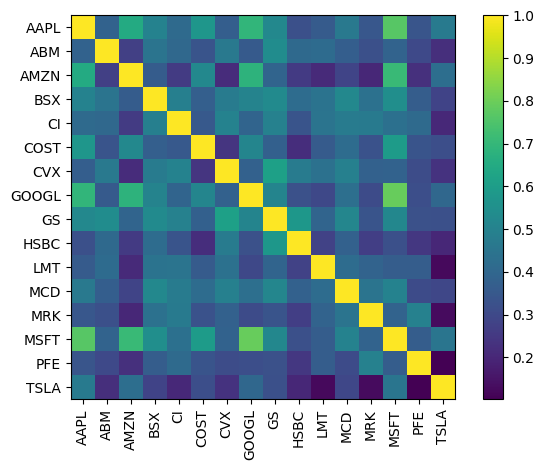

In [6]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

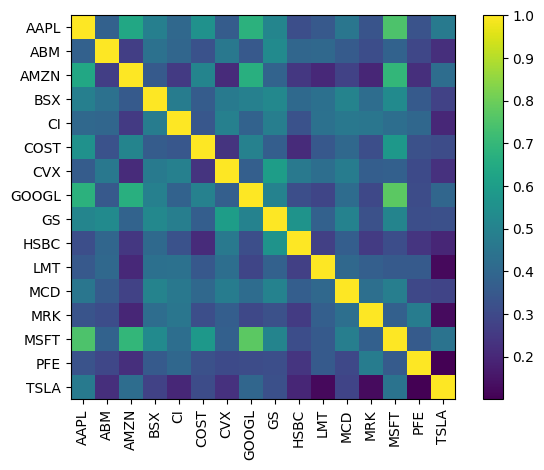

In [7]:
# Ledoit-Wolf shrinkage
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
plotting.plot_covariance(S, plot_correlation=True);

## Return estimation

In [8]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

AAPL     0.253558
ABM      0.236809
AMZN     0.232653
BSX      0.208755
CI       0.219054
COST     0.158505
CVX      0.228435
GOOGL    0.235377
GS       0.242985
HSBC     0.163916
LMT      0.153332
MCD      0.159703
MRK      0.133026
MSFT     0.246239
PFE      0.141398
TSLA     0.360517
Name: mkt, dtype: float64

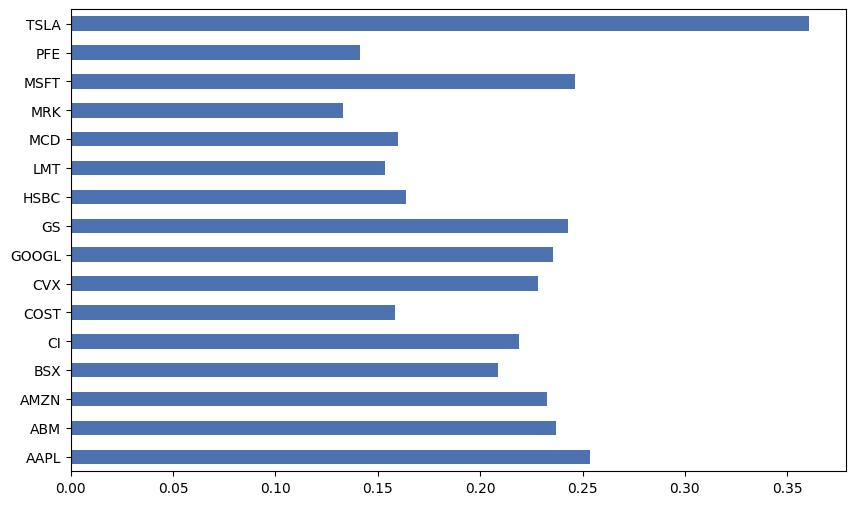

In [9]:
mu.plot.barh(figsize=(10,6));

In [10]:
from pypfopt import EfficientFrontier
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', -0.06204),
             ('ABM', -0.01942),
             ('AMZN', 0.08149),
             ('BSX', 0.00131),
             ('CI', -0.04751),
             ('COST', 0.23345),
             ('CVX', -0.02036),
             ('GOOGL', 0.06537),
             ('GS', -0.05319),
             ('HSBC', 0.18677),
             ('LMT', 0.14969),
             ('MCD', 0.22864),
             ('MRK', 0.23465),
             ('MSFT', -0.11981),
             ('PFE', 0.14206),
             ('TSLA', -0.00109)])

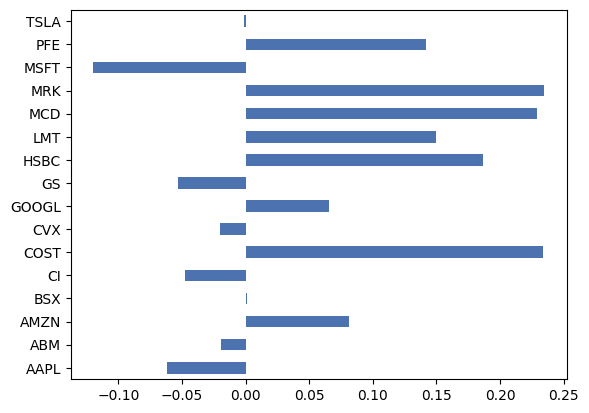

In [11]:
pd.Series(weights).plot.barh();

In [12]:
ef.portfolio_performance(verbose=True);

Annual volatility: 16.5%


In [13]:
from pypfopt import DiscreteAllocation

latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000000, short_ratio=0.3)
alloc, leftover = da.greedy_portfolio() #instead of lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with $11.43 leftover


{'MRK': 1536,
 'COST': 328,
 'MCD': 578,
 'HSBC': 3562,
 'LMT': 246,
 'PFE': 2927,
 'AMZN': 472,
 'GOOGL': 413,
 'BSX': 18,
 'MSFT': -326,
 'AAPL': -297,
 'GS': -153,
 'CI': -157,
 'CVX': -120,
 'ABM': -423,
 'TSLA': -4}

## Max Sharpe with sector constraints

In [14]:
sector_mapper = {
    "AAPL": "Tech",
    "AMZN": "Consumer Discretionary",
    "BSX": "Healthcare",
    "CI": "Healthcare",
    "COST": "Consumer Staples",
    "CVX": "Energy",
    "GOOGL": "Tech",
    "GS": "Financial Services",
    "HSBC": "Financial Services",
    "LMT": "Aerospace",
    "MCD": "Consumer Staples",
    "MRK": "Healthcare",
    "MSFT": "Tech",
    "PFE": "Healthcare",
    "ABM": "Financial Services",
    "TSLA": "Auto"
}

sector_lower = {
    "Tech": 0.05 # at least 5% to tech
    # For all other sectors, it will be assumed there is no lower bound
}

sector_upper = {
    "Tech": 0.3,
    "Aerospace":0.1,
    "Energy": 0.15,
    "Auto":0.15
}

In [15]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.06315),
             ('ABM', 0.06293),
             ('AMZN', 0.0624),
             ('BSX', 0.06282),
             ('CI', 0.06307),
             ('COST', 0.06161),
             ('CVX', 0.06293),
             ('GOOGL', 0.06249),
             ('GS', 0.0631),
             ('HSBC', 0.06185),
             ('LMT', 0.06204),
             ('MCD', 0.06163),
             ('MRK', 0.0616),
             ('MSFT', 0.06345),
             ('PFE', 0.06208),
             ('TSLA', 0.06283)])

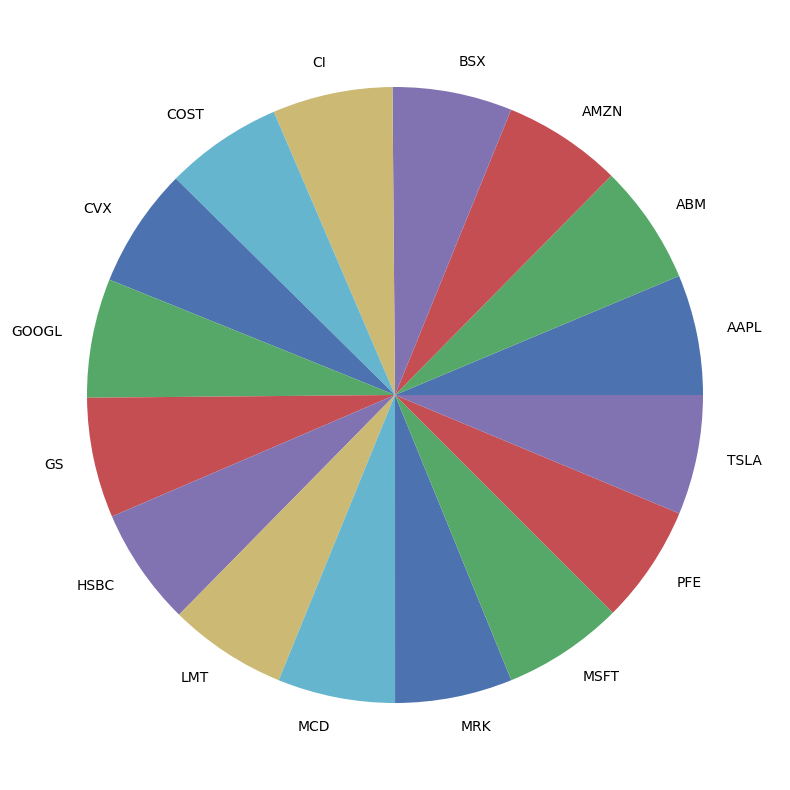

In [16]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [17]:
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.3f}")

Financial Services: 0.188
Consumer Staples: 0.123
Healthcare: 0.250
Consumer Discretionary: 0.062
Auto: 0.063
Tech: 0.189
Energy: 0.063
Aerospace: 0.062


In [18]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.efficient_risk(target_volatility=0.18)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.0),
             ('ABM', 0.02443),
             ('AMZN', 0.06741),
             ('BSX', 0.03262),
             ('CI', 0.01088),
             ('COST', 0.14093),
             ('CVX', 0.02414),
             ('GOOGL', 0.0563),
             ('GS', 0.00814),
             ('HSBC', 0.1218),
             ('LMT', 0.1),
             ('MCD', 0.13903),
             ('MRK', 0.14237),
             ('MSFT', 0.0),
             ('PFE', 0.09975),
             ('TSLA', 0.0322)])

In [19]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

2/16 tickers have zero weight


In [20]:
ef.portfolio_performance(verbose=True);

Expected annual return: 17.6%
Annual volatility: 18.0%
Sharpe Ratio: 0.87


In [21]:
from pypfopt import objective_functions

# You must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamme is the tuning parameter
ef.efficient_risk(0.18)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.00907),
             ('ABM', 0.02351),
             ('AMZN', 0.0646),
             ('BSX', 0.04079),
             ('CI', 0.01707),
             ('COST', 0.13507),
             ('CVX', 0.02527),
             ('GOOGL', 0.05005),
             ('GS', 0.01241),
             ('HSBC', 0.11791),
             ('LMT', 0.1),
             ('MCD', 0.1299),
             ('MRK', 0.13988),
             ('MSFT', 0.00136),
             ('PFE', 0.10838),
             ('TSLA', 0.02473)])

In [22]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

0/16 tickers have zero weight


In [23]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=1)  # gamme is the tuning parameter
ef.efficient_risk(0.18)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.0152),
             ('ABM', 0.02372),
             ('AMZN', 0.0576),
             ('BSX', 0.04858),
             ('CI', 0.02645),
             ('COST', 0.12726),
             ('CVX', 0.02798),
             ('GOOGL', 0.04282),
             ('GS', 0.01694),
             ('HSBC', 0.1134),
             ('LMT', 0.1),
             ('MCD', 0.12124),
             ('MRK', 0.13792),
             ('MSFT', 0.01623),
             ('PFE', 0.11701),
             ('TSLA', 0.00765)])

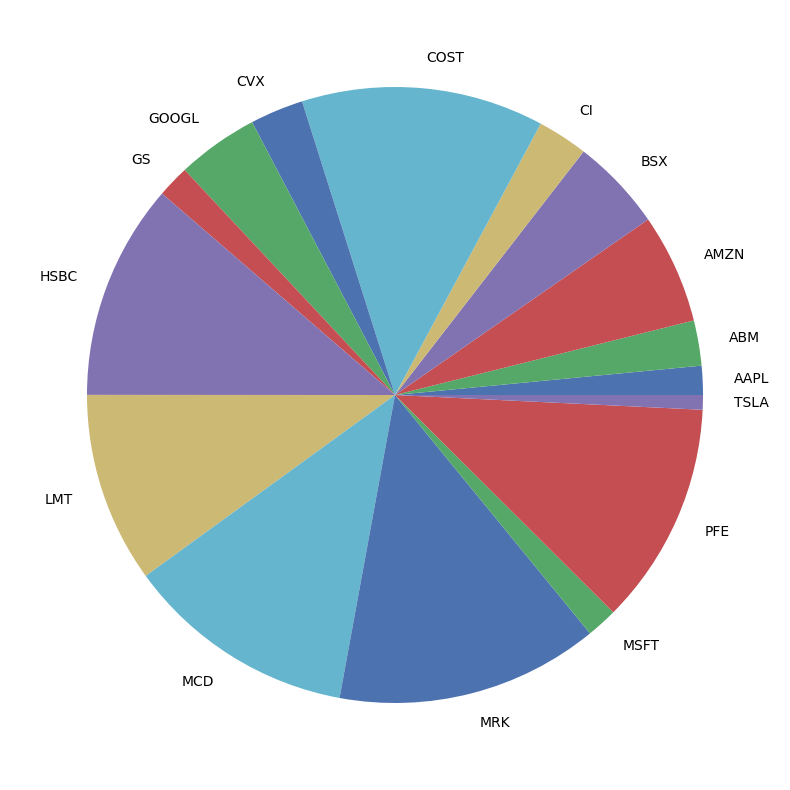

In [24]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [25]:
ef.portfolio_performance(verbose=True);

Expected annual return: 17.4%
Annual volatility: 18.0%
Sharpe Ratio: 0.86


In [26]:
# Must have no weight bounds to allow shorts
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.06469),
             ('ABM', 0.04674),
             ('AMZN', 0.02695),
             ('BSX', 0.00242),
             ('CI', 0.02279),
             ('COST', -0.08248),
             ('CVX', 0.03486),
             ('GOOGL', 0.03633),
             ('GS', 0.05449),
             ('HSBC', -0.07031),
             ('LMT', -0.08241),
             ('MCD', -0.07808),
             ('MRK', -0.11579),
             ('MSFT', 0.05503),
             ('PFE', -0.1004),
             ('TSLA', 0.18519)])

In [27]:
ef.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual volatility: 15.2%
Sharpe Ratio: 0.33


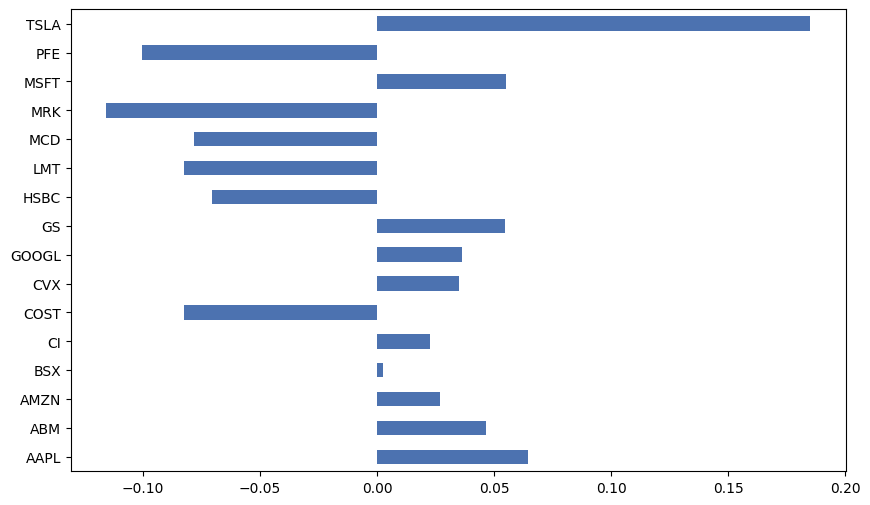

In [28]:
pd.Series(weights).plot.barh(figsize=(10,6));

In [29]:
print(f"Net weight: {sum(weights.values()):.2f}")

Net weight: 0.00
